# CMPINF 2100: Midterm exam

## Han Fengyang

### Assigned: Tuesday of Week 09 at 11:00PM 

### DUE: Tuesday of Week 10 at 11:59PM

You may add as many code and markdown cells as you see fit to answer the questions.

## You are NOT allowed to collaborate with anyone on this exam.

### Overview

You will demonstrate your ability to merge, group, summarize, visualize, and find patterns in data. This exam uses data associated with a manufacturing example. An overview of the goals, considerations, CSV files, and variables within the data is provided in a presentation on Canvas. Please read through those slides before starting the exam.

The data are provided in 5 separate CSV files. The CSV files are available on Canvas. You **MUST** download the files and save them to the same working directory as this notebook.

The specific instructions in this notebook tell you when you must JOIN the data together. Please read the problems carefully.

The overall objective of this exam is to JOIN data from multiple files in order to explore and find interesting patterns between the machine operating conditions and supplier information. You will report your findings within this notebook by displaying Pandas DataFrames and statistical visualizations via Seaborn and matplotlib when necessary.  

## Import modules

You are permitted to use the following modules on this exam.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

You may also use the following functions from scikit-learn on this exam.

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

You may also use the following sub module from SCIPY.

In [3]:
from scipy.cluster import hierarchy

You are **NOT** permitted to use any other modules or functions. However, you **ARE** permitted to create your own user defined functions if you would like.

## Problem 01

The file names for the 3 machine data sets are provided as strings in the cell below. You are required to read in the CSV files and assign the data to the `m01_df`, `m02_df`, and `m03_df` objects. The data from machine 1 will therefore be associated with `m01_df`, machine 2 is associated with `m02_df`, and machine 3 is associated with `m03_df`.  

In this problem you must explore each of the three machine data sets. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in each data set? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:

* How many unique values for `Batch` are associated with each MACHINE (data set)?
* How many cell phone cases are associated with each `Batch` value for each MACHINE (data set)?
* Do the summary statistics of the OPERATING VARIABLES `x1` through `x4` vary across the three MACHINES?
* Do the summary statistics of the OPERATING VARIABLES `x1` through `x4` vary across the `Batch` values?
* Do the relationships between the OPERATING VARIABLES `x1` through `x4` vary across the three MACHINES?
* Do the relationships between the OPERATING VARIABLES `x1` through `x4` vary across the `Batch` values?

At the conclusion of this problem, you **MUST** CONCATENATE the 3 MACHINE data sets into a single DataFrame. The single DataFrame must be named `machine_df`. Before concatenating, you **MUST** add a column `machine_id` to each DataFrame with the correct index value for that machine (1, 2, or 3). The concatenating DataFrame variable name is provided as a reminder to you below. 

You may add as many markdown and code cells as you see fit to answer this question. Include markdown cells stating what you see in the figures and why you selected to use them.

#### SOLUTION

In [4]:
# Define the files's for the 3 machine level CSV files

file_m01 = 'midterm_machine_01.csv'

file_m02 = 'midterm_machine_02.csv'

file_m03 = 'midterm_machine_03.csv'

In [5]:
# read in the CSV files and name them accordingly

m01_df = pd.read_csv(file_m01)

m02_df = pd.read_csv(file_m02)

m03_df = pd.read_csv(file_m03)

In [6]:
## 1. How many rows and columns are in each data set?
dataframes = {'m01_df': m01_df, 'm02_df': m02_df, 'm03_df': m03_df}

for name, df in dataframes.items():
    print(f'{name} has {df.shape[0]} rows and {df.shape[1]} columns')

m01_df has 5152 rows and 7 columns
m02_df has 5119 rows and 7 columns
m03_df has 4458 rows and 7 columns


In [7]:
## 2.What are the names and data types of the columns in each data set?
dataframes = {'m01_df': m01_df, 'm02_df': m02_df, 'm03_df': m03_df}

for name, df in dataframes.items():
    print(f'The names and data types of the columns in {name} are \n{df.dtypes}')

The names and data types of the columns in m01_df are 
ID        object
Batch      int64
s_id       int64
x1       float64
x2       float64
x3       float64
x4       float64
dtype: object
The names and data types of the columns in m02_df are 
ID        object
Batch      int64
s_id       int64
x1       float64
x2       float64
x3       float64
x4       float64
dtype: object
The names and data types of the columns in m03_df are 
ID        object
Batch      int64
s_id       int64
x1       float64
x2       float64
x3       float64
x4       float64
dtype: object


In [8]:
## 3.How many unique values are there for each column of each data set?
dataframes = {'m01_df': m01_df, 'm02_df': m02_df, 'm03_df': m03_df}

for name, df in dataframes.items():
    print(f'The unique values for {name} are \n{df.nunique()}')

The unique values for m01_df are 
ID       5152
Batch      50
s_id      149
x1       5152
x2       5152
x3       5152
x4       5152
dtype: int64
The unique values for m02_df are 
ID       5119
Batch      50
s_id      133
x1       5119
x2       5119
x3       5119
x4       5119
dtype: int64
The unique values for m03_df are 
ID       4458
Batch      41
s_id      141
x1       4458
x2       4458
x3       4458
x4       4458
dtype: int64


In [9]:
## 4. How many missing values are there for each column of each data set?
dataframes = {'m01_df': m01_df, 'm02_df': m02_df, 'm03_df': m03_df}

for name, df in dataframes.items():
    print(f'The missing values for {name} are \n{df.isnull().sum()}')

The missing values for m01_df are 
ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64
The missing values for m02_df are 
ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64
The missing values for m03_df are 
ID       0
Batch    0
s_id     0
x1       0
x2       0
x3       0
x4       0
dtype: int64


In [10]:
## Sum all
m_df = pd.concat([m01_df, m02_df, m03_df])

## m01_df Wide to Long Format
m01_df_lf = m01_df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['ID','rowid','Batch','s_id'], var_name='variable', value_name='value')
m01_df_lf['machine_id'] = 'm01'

## m02_df Wide to Long Format
m02_df_lf = m02_df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['ID','rowid','Batch','s_id'], var_name='variable', value_name='value')
m02_df_lf['machine_id'] = 'm02'

## m03_df Wide to Long Format
m03_df_lf = m03_df.reset_index().\
rename(columns={'index': 'rowid'}).\
melt(id_vars=['ID','rowid','Batch','s_id'], var_name='variable', value_name='value')
m03_df_lf['machine_id'] = 'm03'

## sum all in Long Format
m_df_lf = pd.concat([m01_df_lf, m02_df_lf, m03_df_lf])
m_df_lf

ID  rowid  Batch  s_id variable      value machine_id
0      B001-M01-S001      0      1     1       x1  50.117118        m01
1      B001-M01-S002      1      1     2       x1  46.887333        m01
2      B001-M01-S003      2      1     3       x1  50.132744        m01
3      B001-M01-S004      3      1     4       x1  48.501042        m01
4      B001-M01-S005      4      1     5       x1  49.690442        m01
...              ...    ...    ...   ...      ...        ...        ...
17827  B049-M03-S100   4453     49   100       x4  13.753264        m03
17828  B049-M03-S101   4454     49   101       x4  13.636539        m03
17829  B049-M03-S102   4455     49   102       x4  13.678206        m03
17830  B049-M03-S103   4456     49   103       x4  13.880084        m03
17831  B049-M03-S104   4457     49   104       x4  13.853014        m03

[58916 rows x 7 columns]

In [11]:
m_df_lf

ID  rowid  Batch  s_id variable      value machine_id
0      B001-M01-S001      0      1     1       x1  50.117118        m01
1      B001-M01-S002      1      1     2       x1  46.887333        m01
2      B001-M01-S003      2      1     3       x1  50.132744        m01
3      B001-M01-S004      3      1     4       x1  48.501042        m01
4      B001-M01-S005      4      1     5       x1  49.690442        m01
...              ...    ...    ...   ...      ...        ...        ...
17827  B049-M03-S100   4453     49   100       x4  13.753264        m03
17828  B049-M03-S101   4454     49   101       x4  13.636539        m03
17829  B049-M03-S102   4455     49   102       x4  13.678206        m03
17830  B049-M03-S103   4456     49   103       x4  13.880084        m03
17831  B049-M03-S104   4457     49   104       x4  13.853014        m03

[58916 rows x 7 columns]

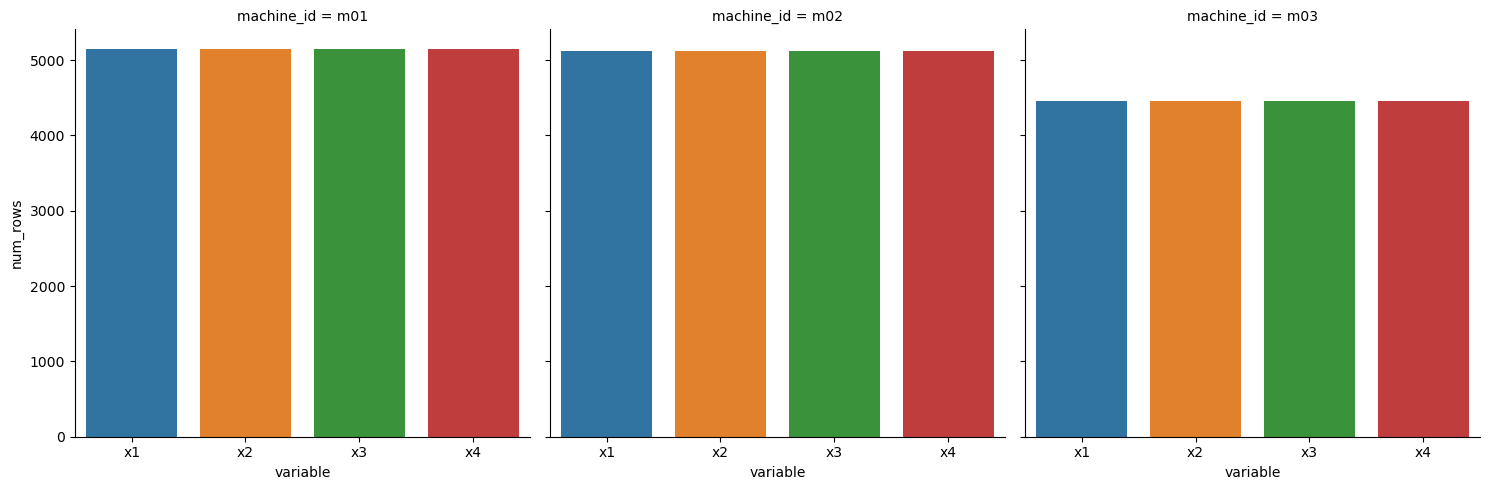

In [12]:
# 5. Explore the MARGINAL behavior of the variables in the data.
marginal_df = m_df_lf.groupby(['variable','machine_id']).size().reset_index(name='num_rows')
sns.catplot(data = marginal_df, x = 'variable', col = 'machine_id', kind = 'bar', y = 'num_rows')

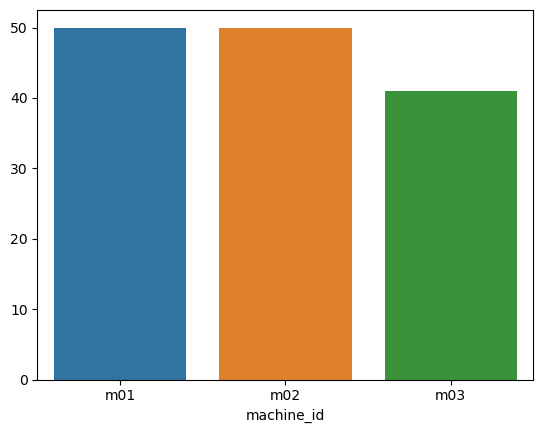

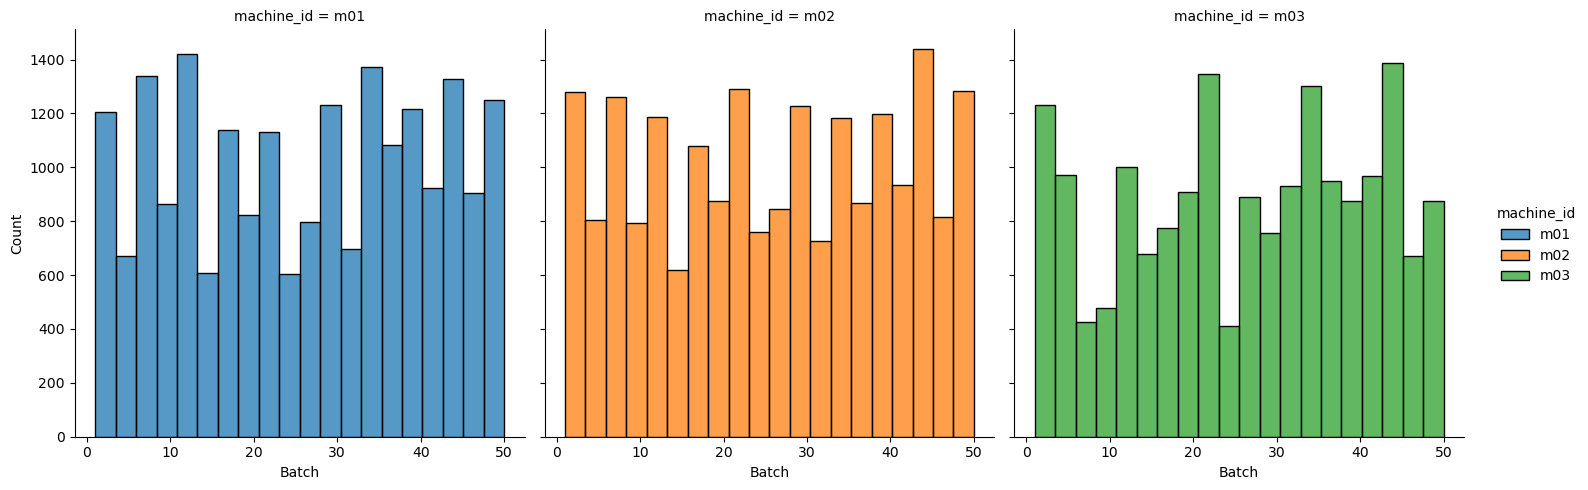

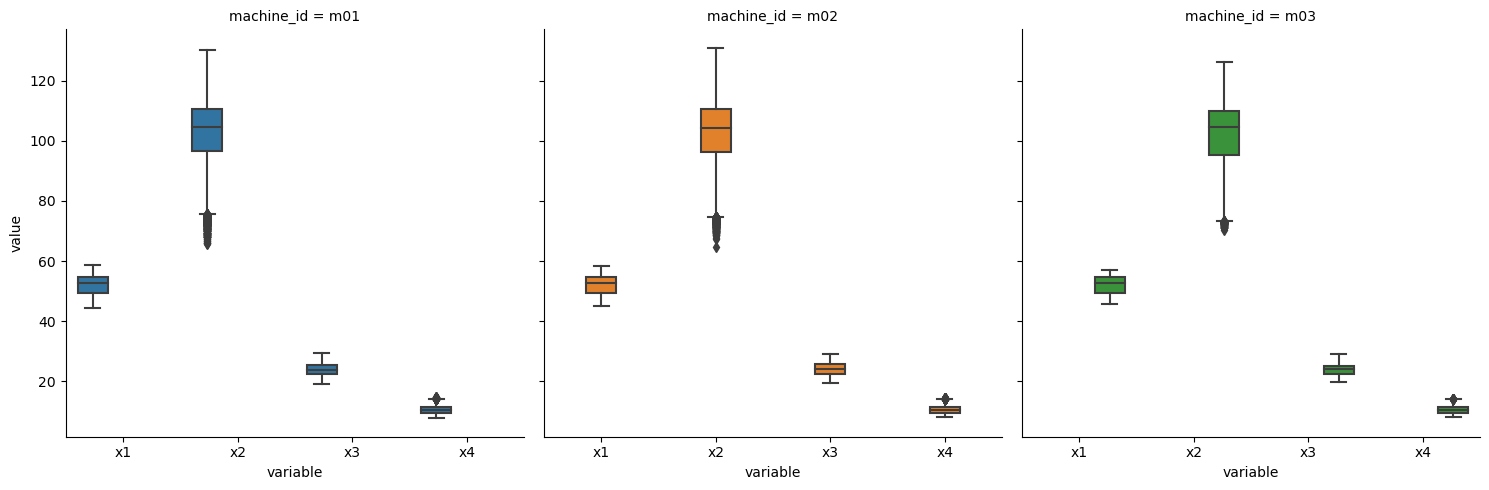

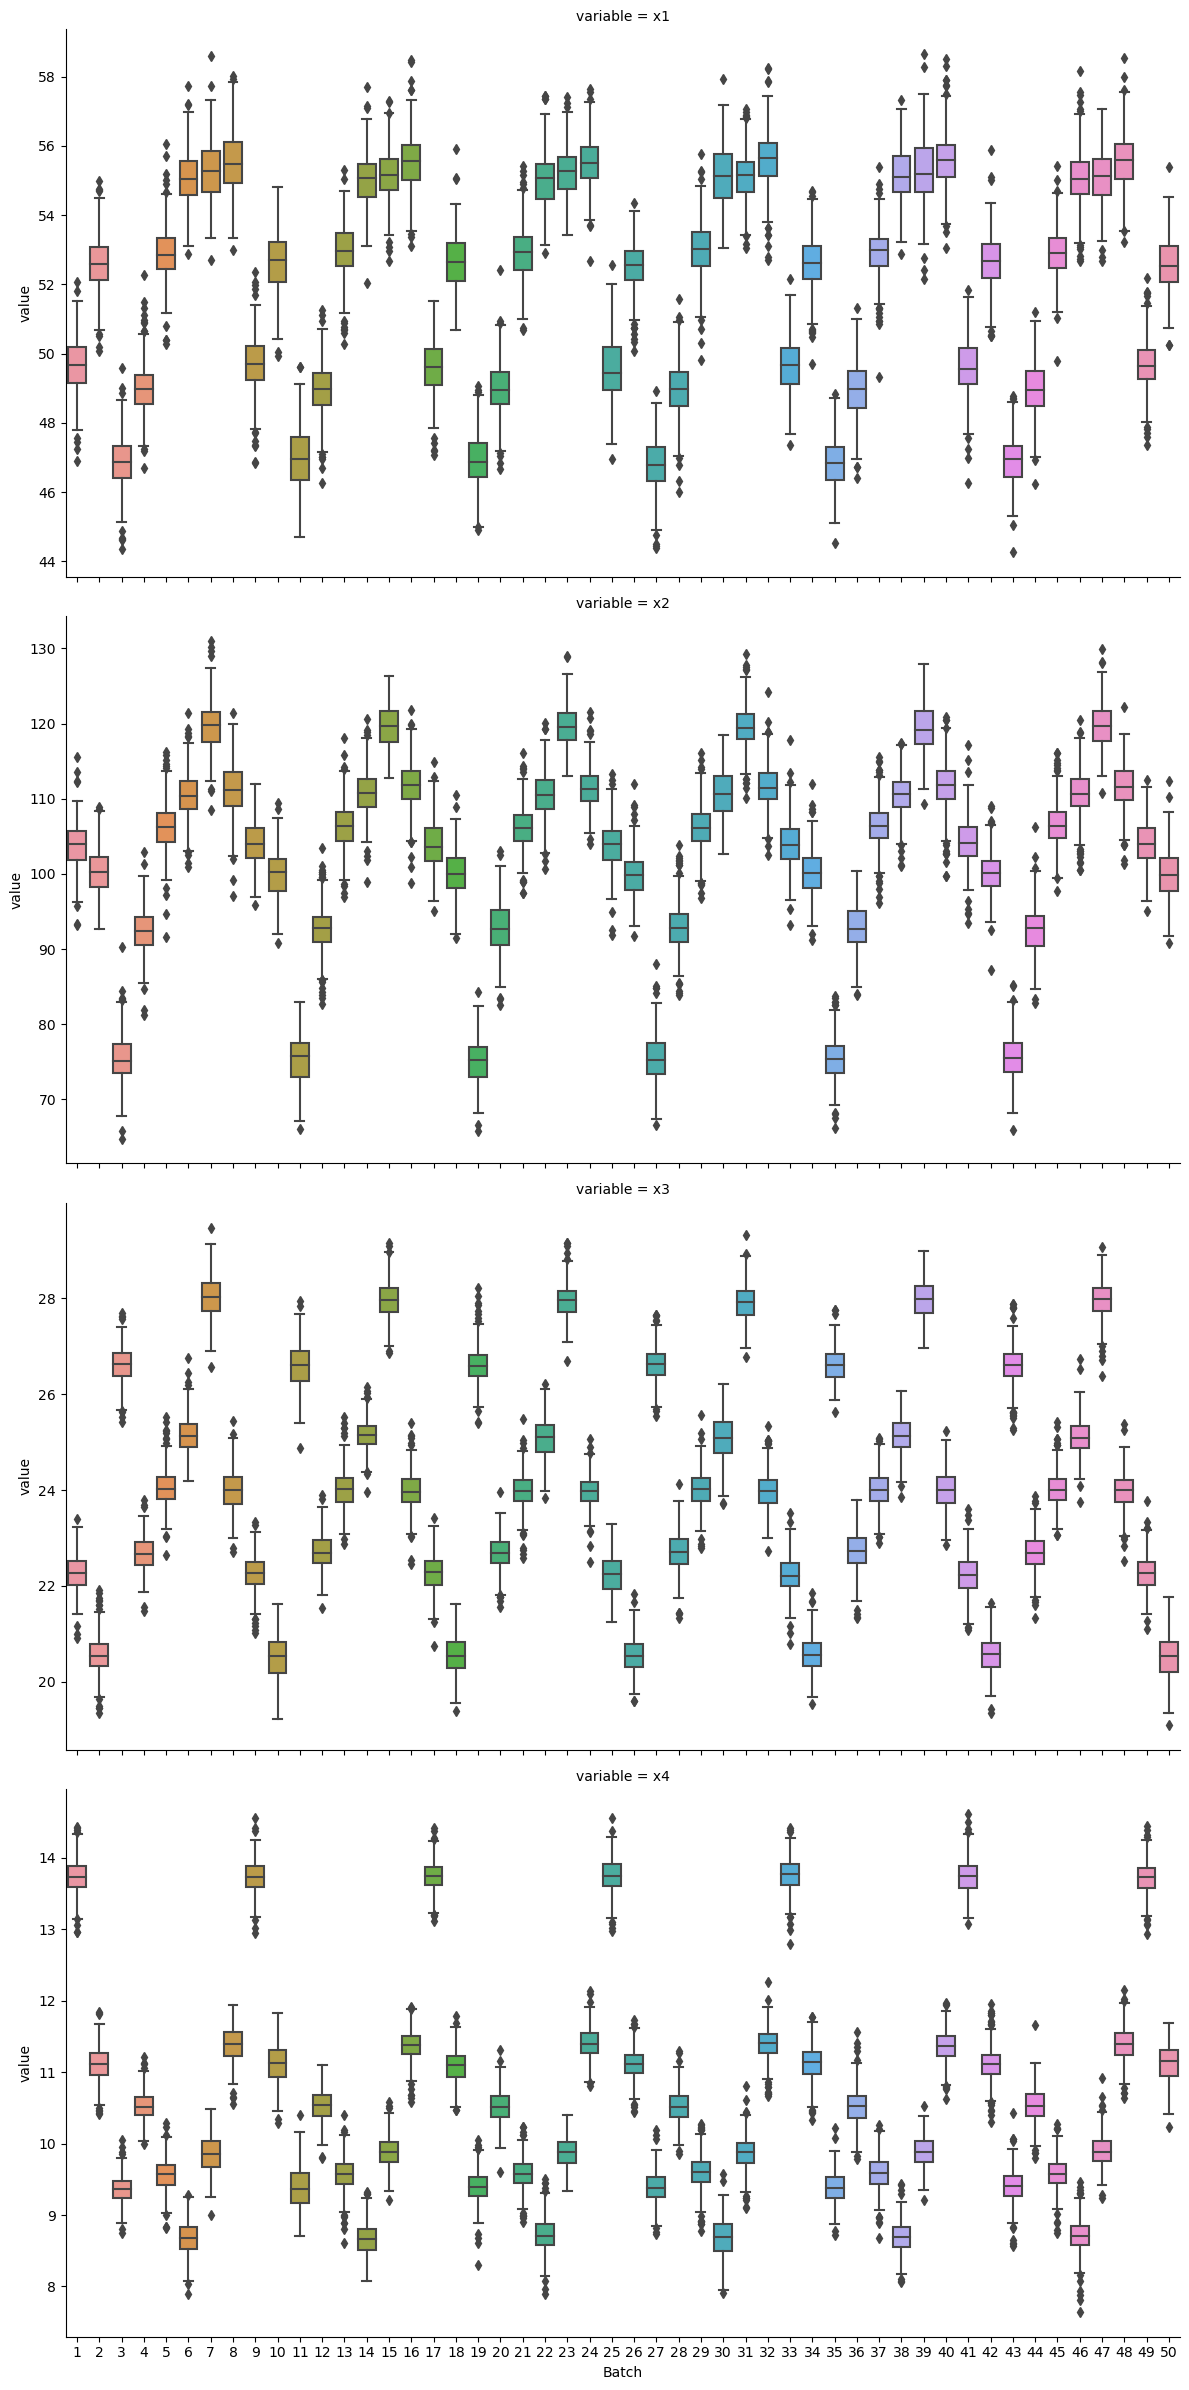

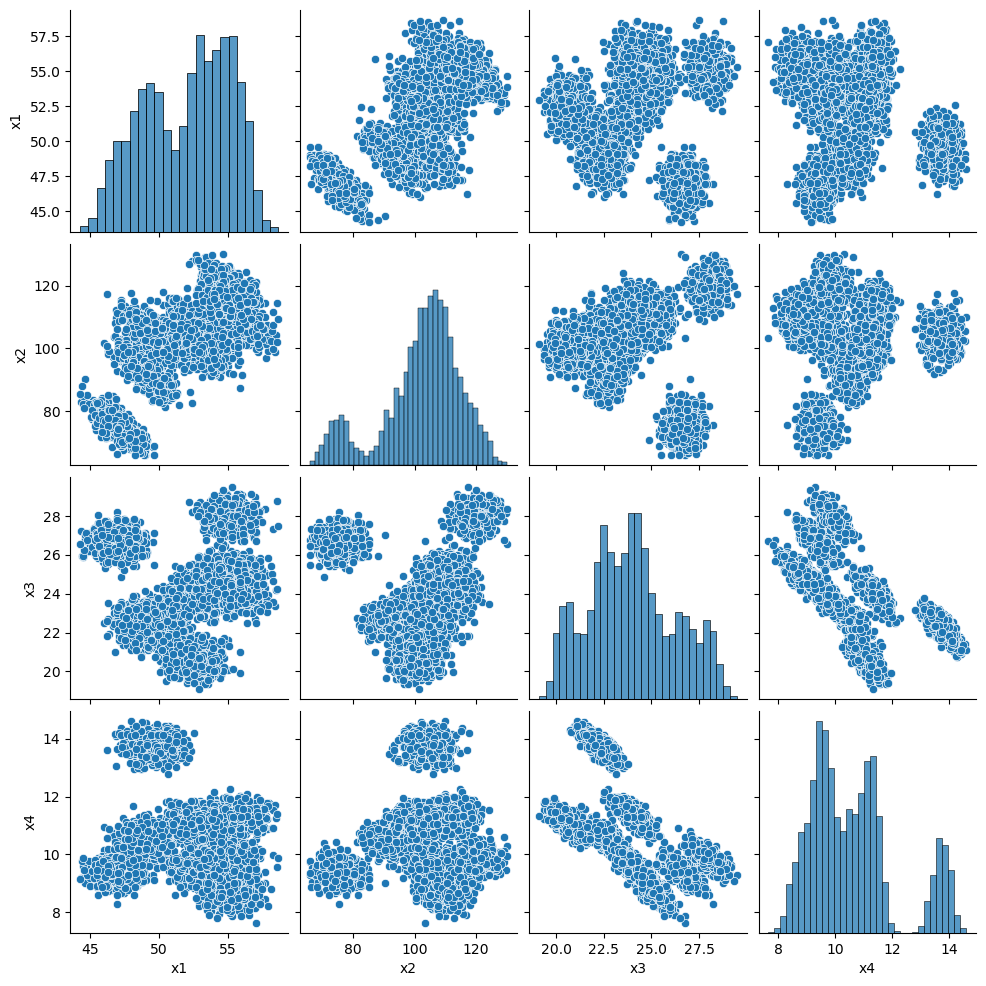

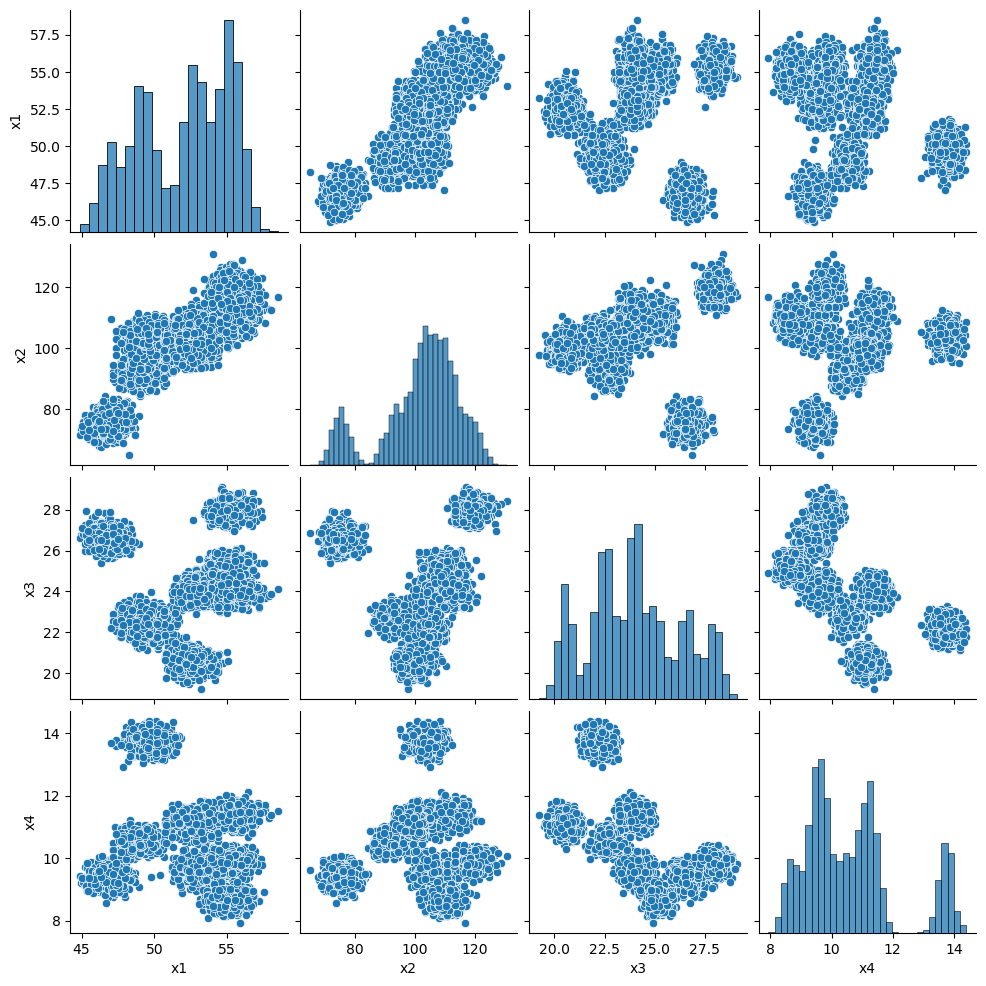

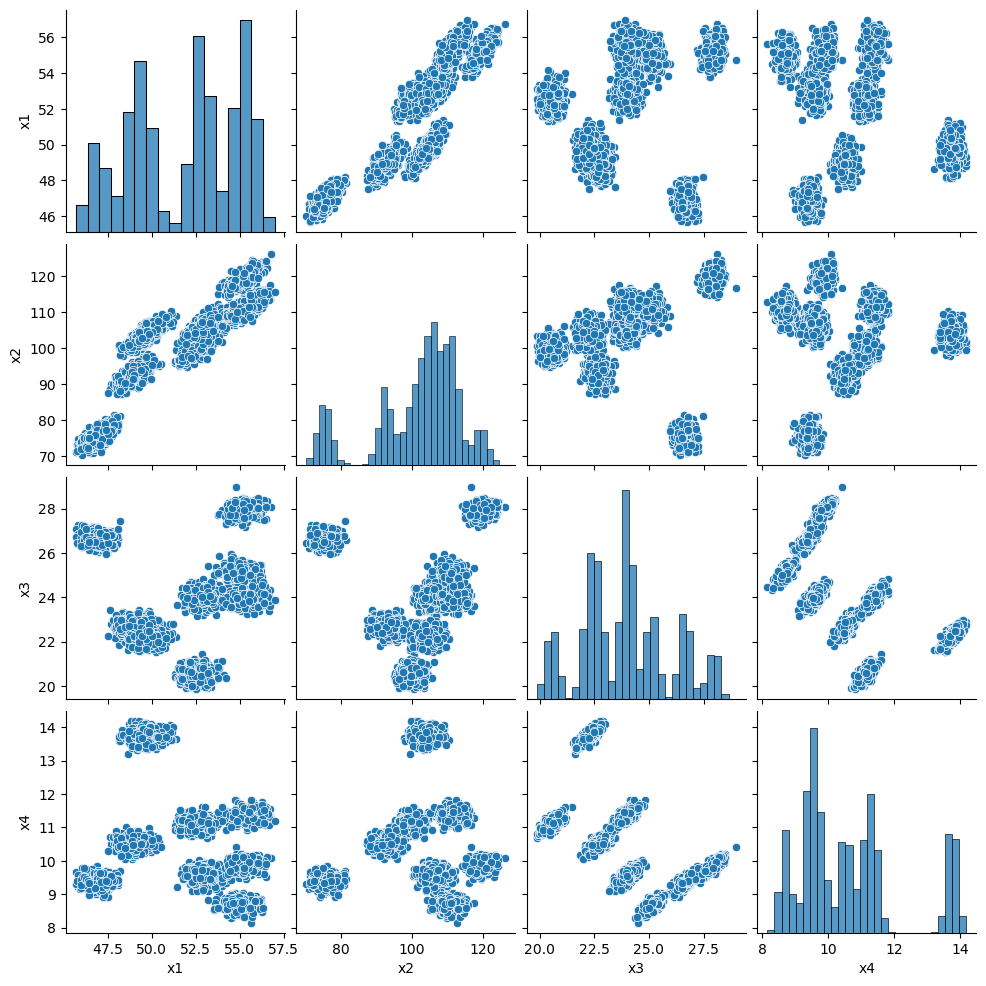

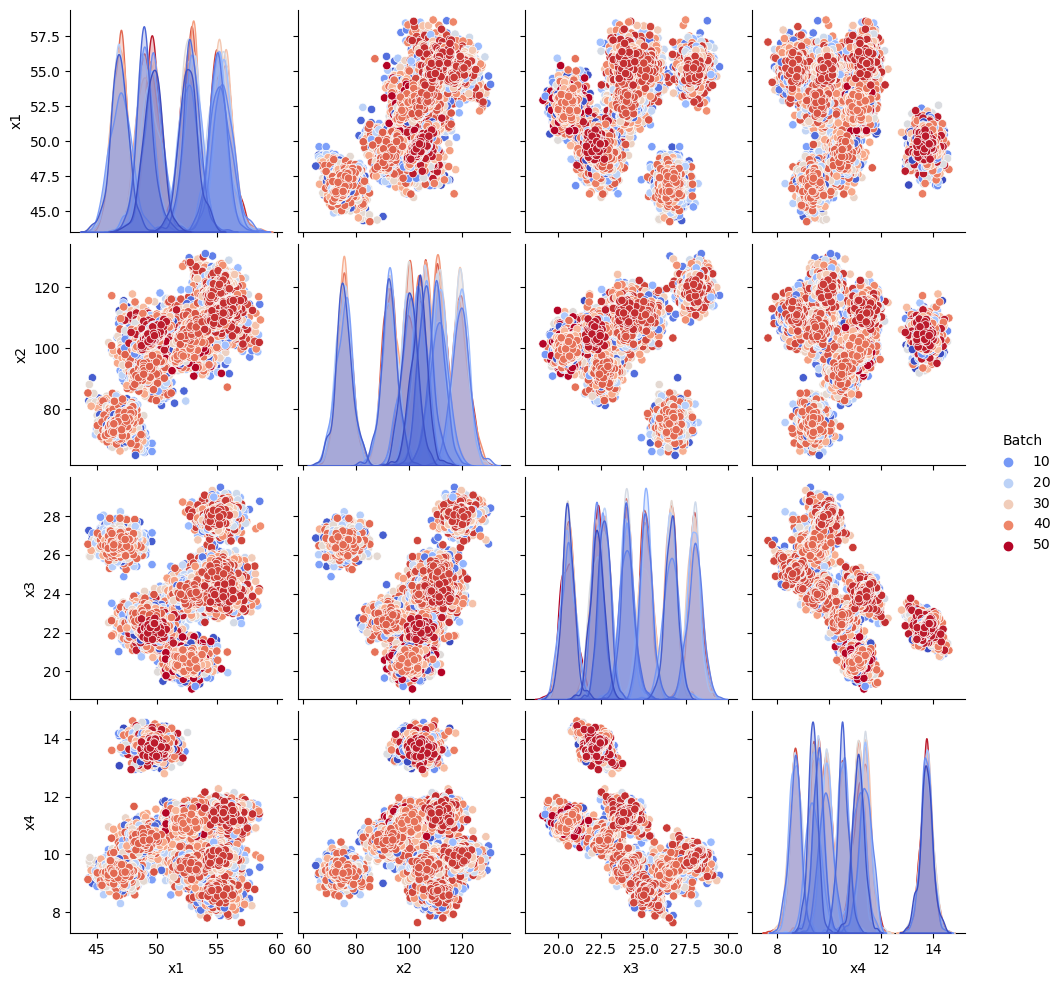

In [13]:
# 6. Explore the RELATIONSHIP between the variables in the data.

## 6.1. How many unique values for Batch are associated with each machine? Plot the overall length of Batch of each machine.
unique_batches_per_machine = m_df_lf.groupby('machine_id')['Batch'].nunique()
sns.barplot(x=unique_batches_per_machine.index, y=unique_batches_per_machine.values)

## 6.2 How many cell phone cases are associated with each Batch value for each machine?
sns.displot(data=m_df_lf, x='Batch', hue='machine_id', multiple='stack', col='machine_id',bins=20)

## 6.3. Summary statistics for each variable from x1 to x4 for each machine.
sns.catplot(data=m_df_lf, x = 'variable', y='value', hue='machine_id', kind='box', col='machine_id')

## 6.4 Summary statistics for each variable from x1 to x4 across Batch
sns.catplot(data=m_df_lf, x = 'Batch', y='value', kind='box', col='variable', height=6, aspect=2, col_wrap=1, sharey=False)

## 6.5 Relationship between x1 through x4 for each machine.
sns.pairplot(data=m01_df, vars=['x1','x2','x3','x4'], diag_kws={'common_norm':False})
sns.pairplot(data=m02_df, vars=['x1','x2','x3','x4'], diag_kws={'common_norm':False})
sns.pairplot(data=m03_df, vars=['x1','x2','x3','x4'], diag_kws={'common_norm':False})

## 6.6 Relationship between x1 through x4 across Batch, here, m_df is the sum of all machines
sns.pairplot(data=m_df, hue='Batch', vars=['x1','x2','x3','x4'], palette='coolwarm',
             diag_kws={'common_norm':False})


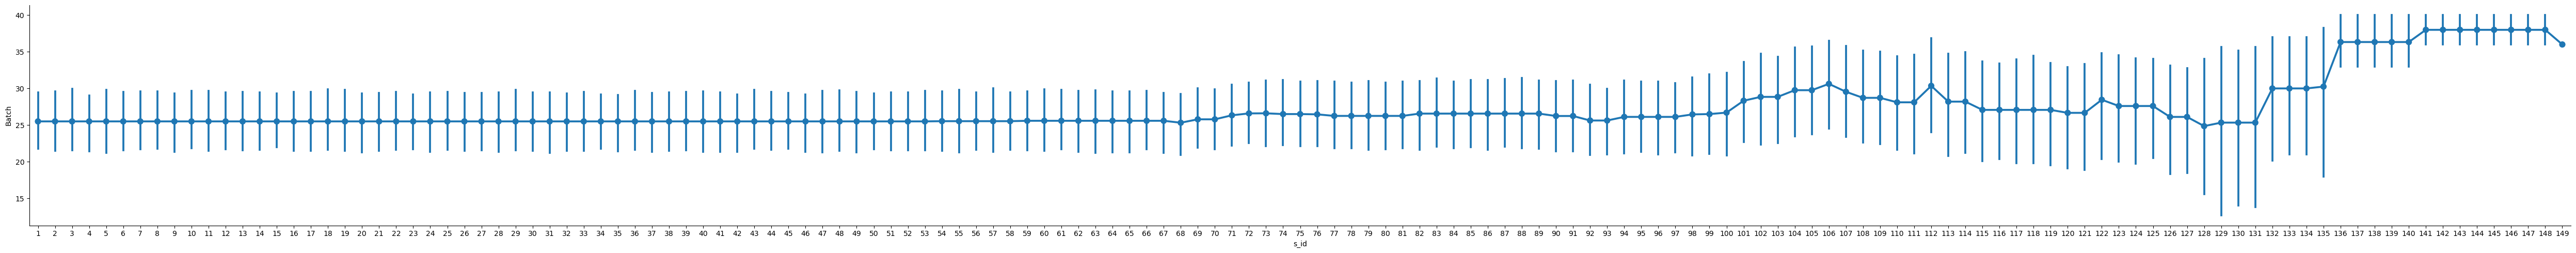

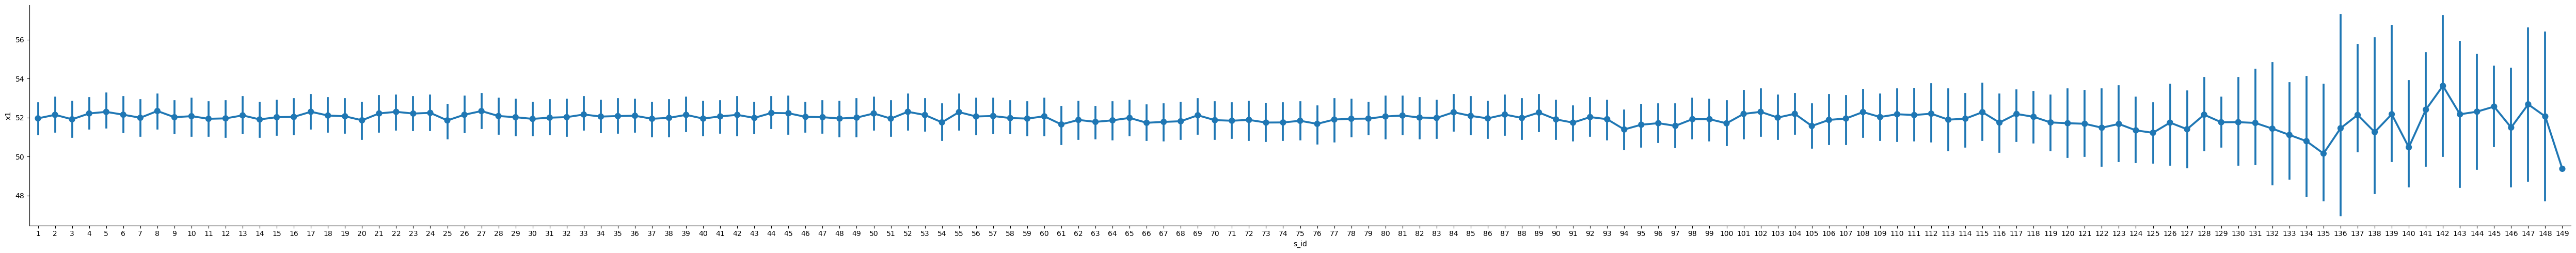

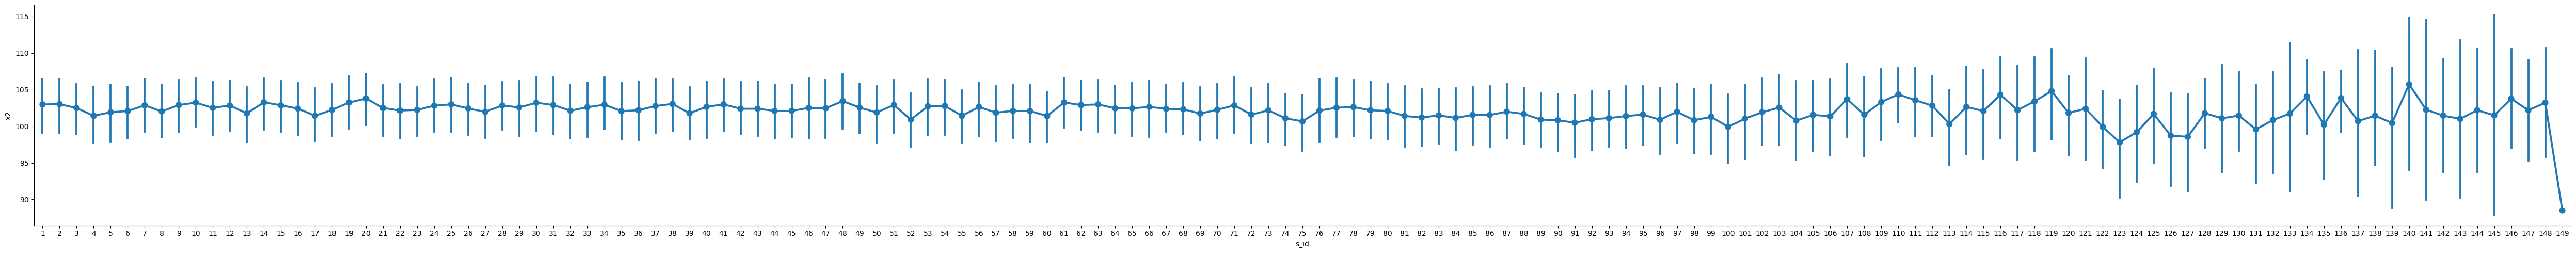

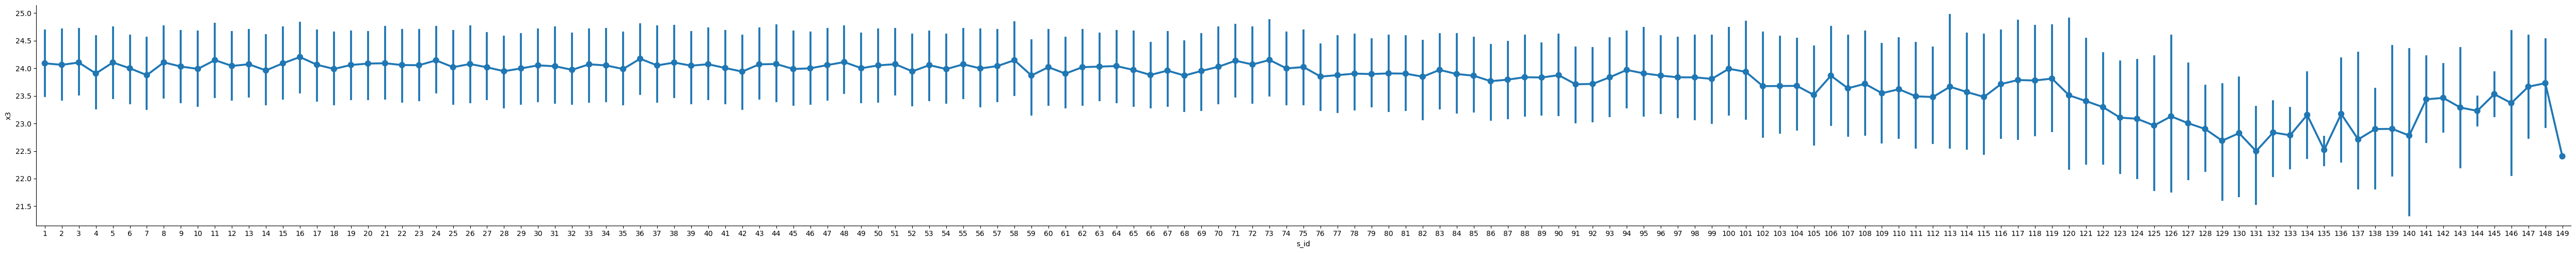

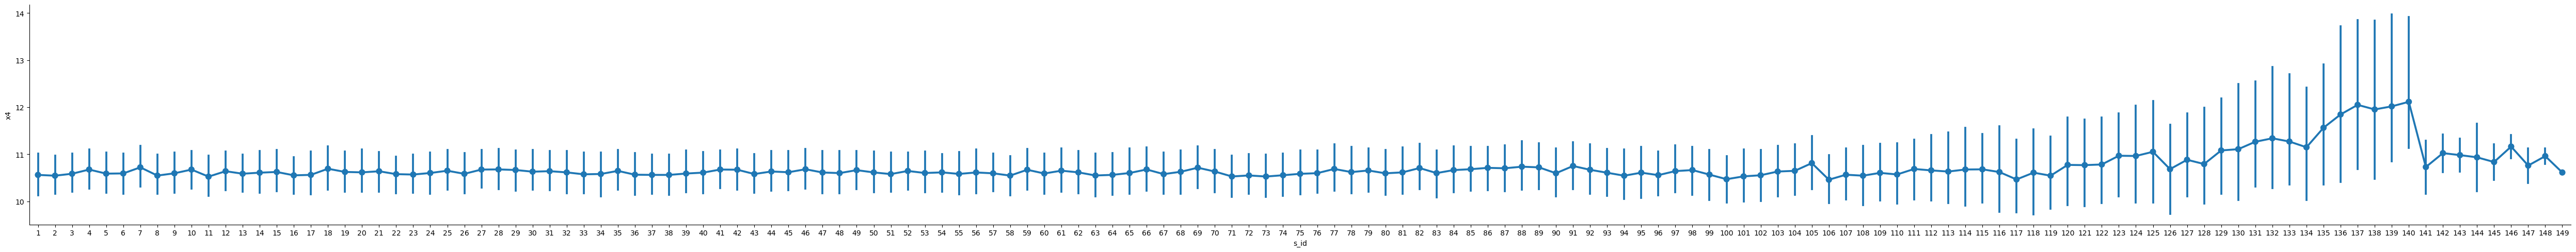

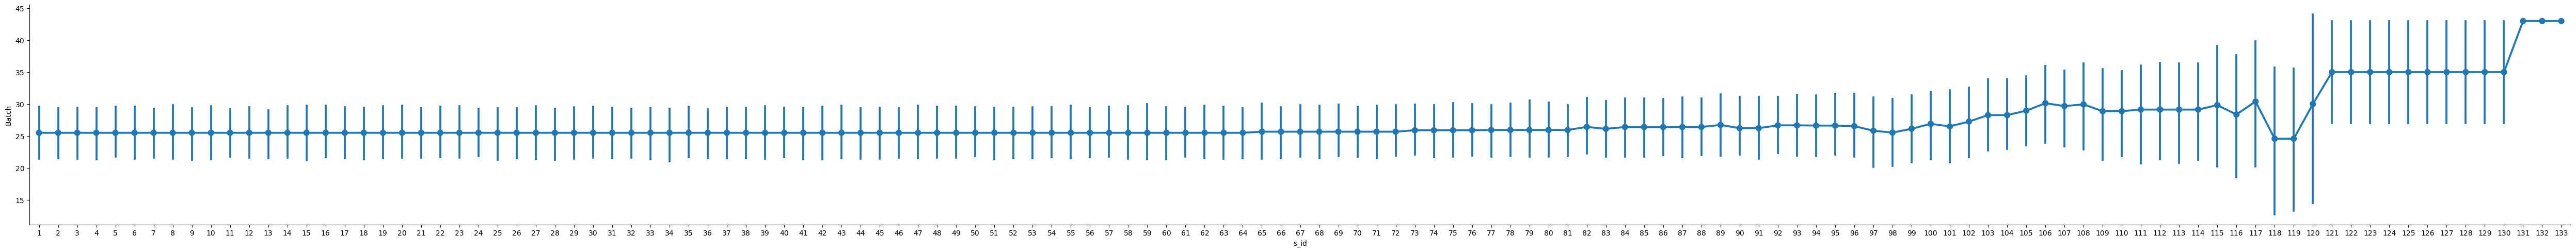

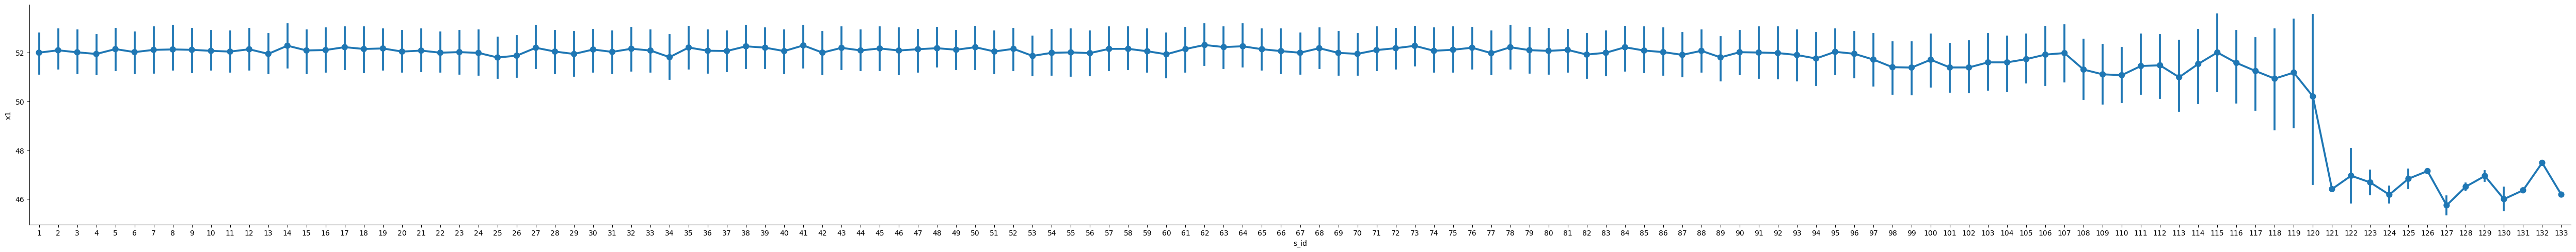

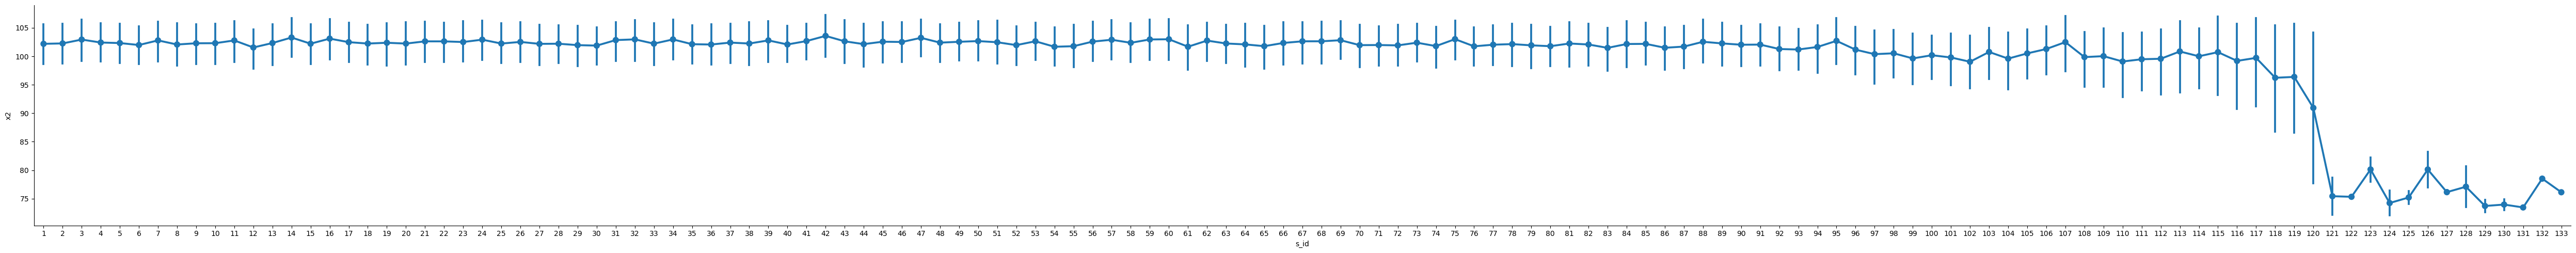

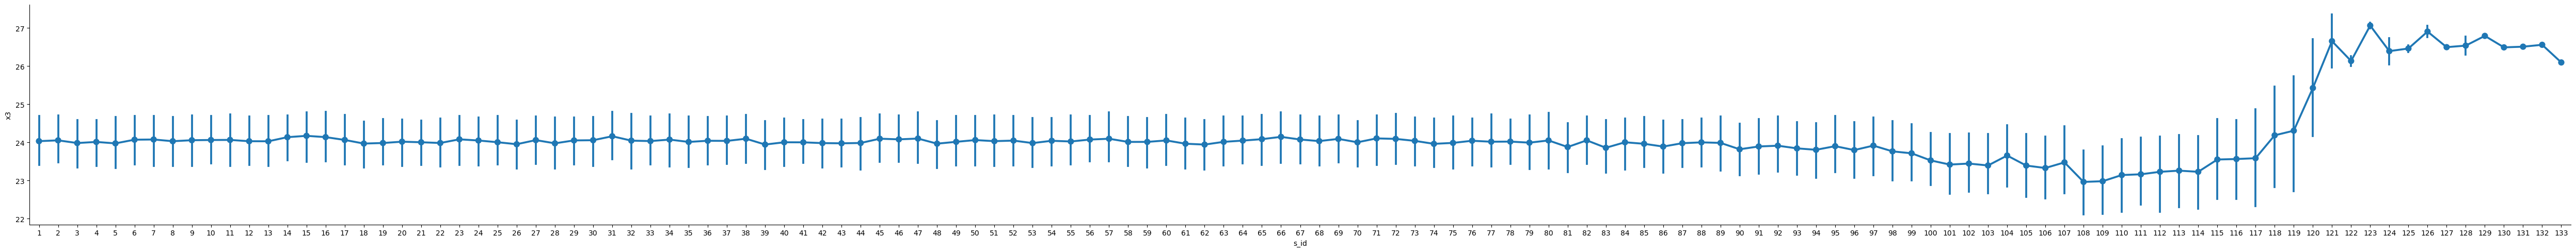

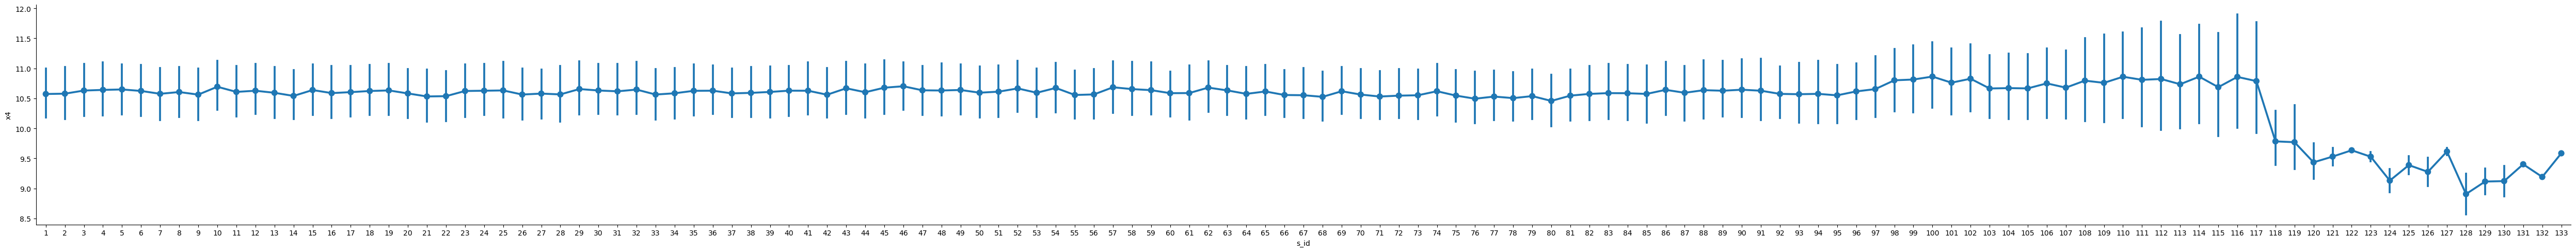

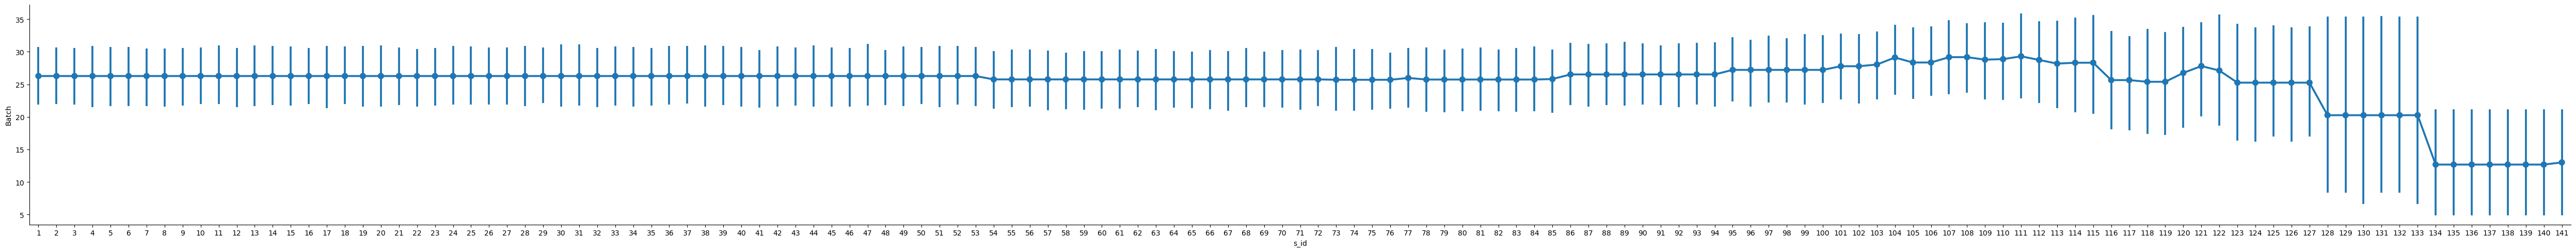

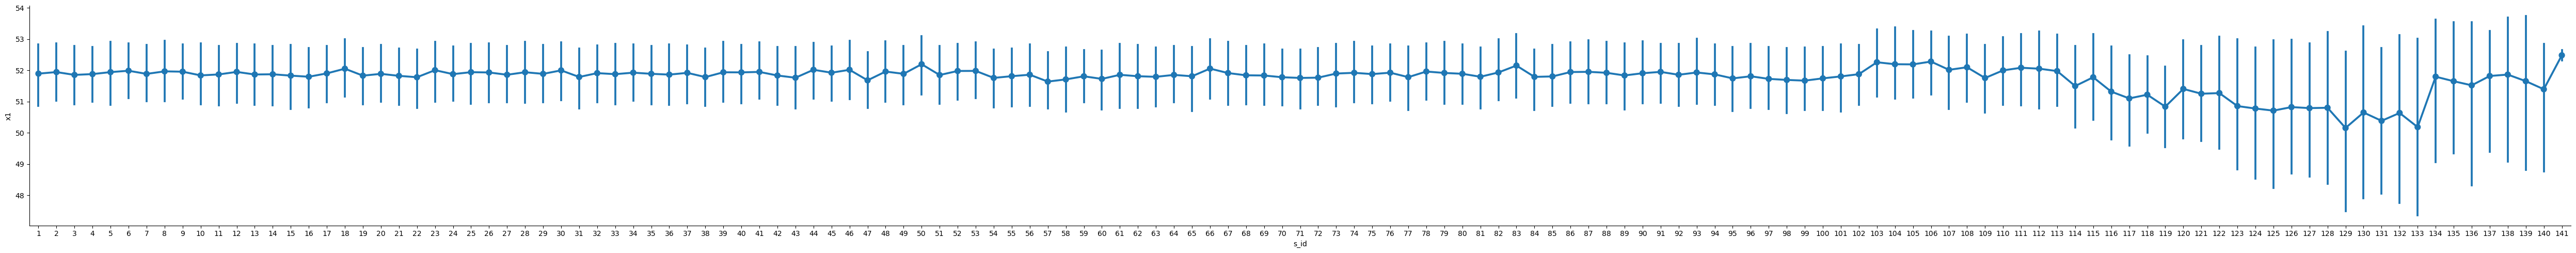

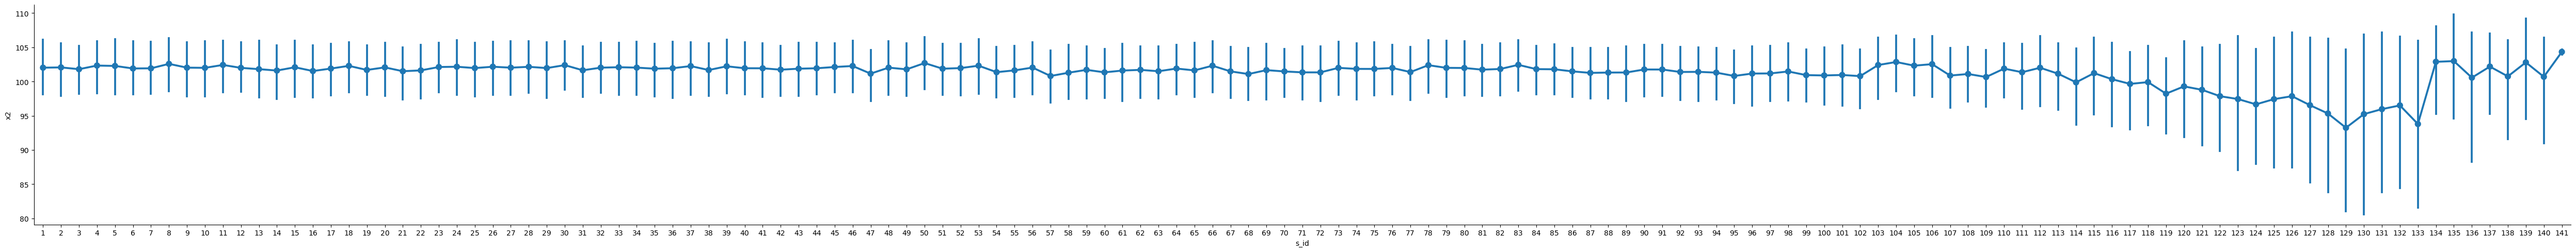

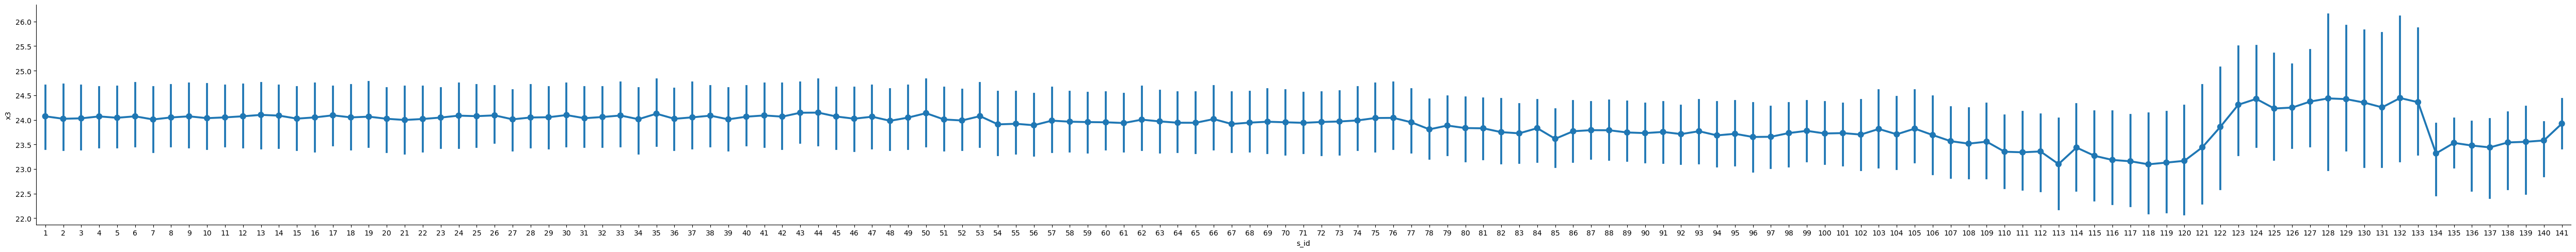

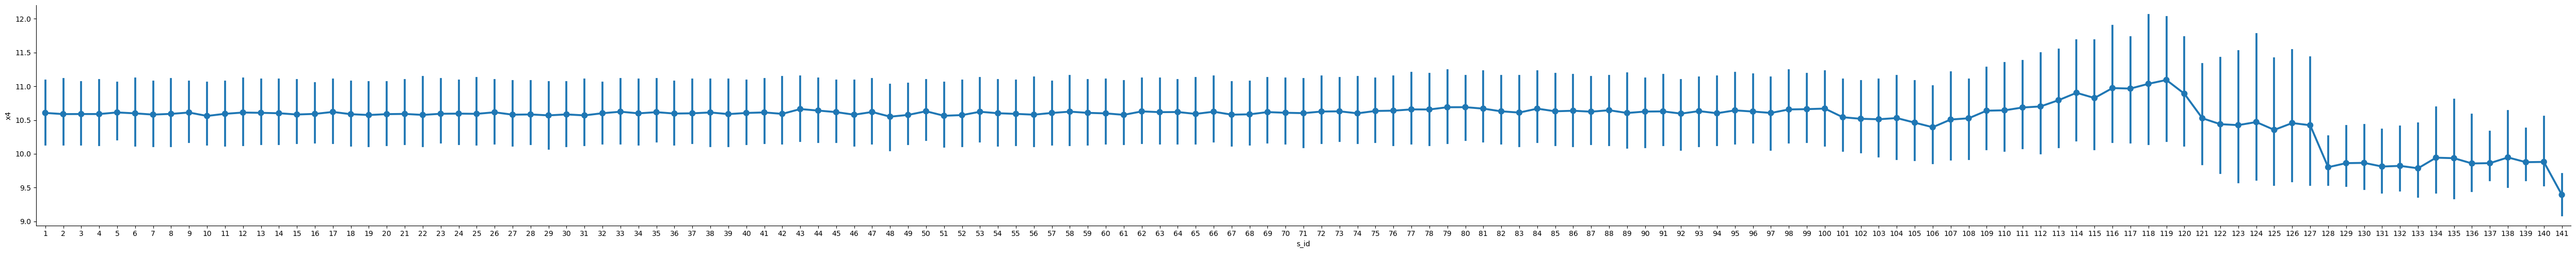

In [14]:
## Further plot for s_id and other variables
### for md01_df
sns.catplot(data=m01_df, x='s_id', y='Batch', kind='point',aspect=10)
sns.catplot(data=m01_df, x='s_id', y='x1', kind='point',aspect=10)
sns.catplot(data=m01_df, x='s_id', y='x2', kind='point',aspect=10)
sns.catplot(data=m01_df, x='s_id', y='x3', kind='point',aspect=10)
sns.catplot(data=m01_df, x='s_id', y='x4', kind='point',aspect=10)
plt.show()

### for md02_df
sns.catplot(data=m02_df, x='s_id', y='Batch', kind='point',aspect=10)
sns.catplot(data=m02_df, x='s_id', y='x1', kind='point',aspect=10)
sns.catplot(data=m02_df, x='s_id', y='x2', kind='point',aspect=10)
sns.catplot(data=m02_df, x='s_id', y='x3', kind='point',aspect=10)
sns.catplot(data=m02_df, x='s_id', y='x4', kind='point',aspect=10)
plt.show()

### for md03_df
sns.catplot(data=m03_df, x='s_id', y='Batch', kind='point',aspect=10)
sns.catplot(data=m03_df, x='s_id', y='x1', kind='point',aspect=10)
sns.catplot(data=m03_df, x='s_id', y='x2', kind='point',aspect=10)
sns.catplot(data=m03_df, x='s_id', y='x3', kind='point',aspect=10)
sns.catplot(data=m03_df, x='s_id', y='x4', kind='point',aspect=10)
plt.show()

In [15]:
# concatenate the 3 DataFrames into a single DataFrame which includes the `machine_id` variable
# add a new column, if it is from m01_df, the value is 1, if it is from m02_df, the value is 2, if it is from m03_df, the value is 3
m01_df_cp = m01_df.copy()
m01_df_cp['machine_id'] = 1

m02_df_cp = m02_df.copy()
m02_df_cp['machine_id'] = 2

m03_df_cp = m03_df.copy()
m03_df_cp['machine_id'] = 3

machine_df = pd.concat([m01_df_cp, m02_df_cp, m03_df_cp])
machine_df

# Or we can use the following code to add the machine_id column
machine_df = pd.concat([m01_df.assign(machine_id=1), m02_df.assign(machine_id=2), m03_df.assign(machine_id=3)])
machine_df

ID  Batch  s_id         x1          x2         x3         x4  \
0     B001-M01-S001      1     1  50.117118  102.167346  22.067812  13.889524   
1     B001-M01-S002      1     2  46.887333  112.266102  23.197330  13.064709   
2     B001-M01-S003      1     3  50.132744  103.674908  22.319933  13.647482   
3     B001-M01-S004      1     4  48.501042  107.143156  22.162947  14.077758   
4     B001-M01-S005      1     5  49.690442  102.120283  22.248696  13.728666   
...             ...    ...   ...        ...         ...        ...        ...   
4453  B049-M03-S100     49   100  49.278415  102.089925  22.396979  13.753264   
4454  B049-M03-S101     49   101  49.264754  104.619874  21.977716  13.636539   
4455  B049-M03-S102     49   102  49.465358  102.867473  22.257845  13.678206   
4456  B049-M03-S103     49   103  49.751785  104.863427  22.461204  13.880084   
4457  B049-M03-S104     49   104  49.819212  104.075176  22.462165  13.853014   

      machine_id  
0              1  
1              1  
2              1  
3              1  
4              1  
...          ...  
4453           3  
4454           3  
4455           3  
4456           3  
4457           3  

[14729 rows x 8 columns]

## Problem 02

The supplier batch data set file name is provided for you below. You must read in the CSV file and assign the data set to the `batch_df` object. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in the data? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:
* Do the summary statistics for `Density` depend on the `Supplier`?
* Does the average `Density` depend on the `Supplier`?
* How does `Density` relate to `Batch` for each `Supplier`?

After exploring the `batch_df` DataFrame, you **MUST** JOIN/MERGE the `batch_df` DataFrame with the `machine_df` DataFrame. Assign the merged DataFrame to the `dfa` DataFrame.

You can now explore the relationships between the MACHINE OPERATIONAL VARIABLES and the SUPPLIERS! You must use visualizations to explore the following relationships:
* Explore if the summary statistics of the 4 OPERATING VARIABLES `x1` through `x4` vary across `Batch` for each MACHINE given each `Supplier`. Your figures MUST use `Batch` as the x-axis variable.
* Explore if the relationships between the 4 OPERATING VARIABLES `x1` through `x4` vary across `Supplier`.

You may add as many markdown and code cells as you see fit to answer this question.

#### SOLUTION

In [16]:
# define the batch supplier file
batch_file = 'midterm_supplier.csv'

In [17]:
# read in the batch supplier data set
batch_df = pd.read_csv(batch_file)

In [18]:
## 1. How many rows and columns are in the data set?
print(f'The batch_df has {batch_df.shape[0]} rows and {batch_df.shape[1]} columns')

The batch_df has 50 rows and 3 columns


In [19]:
## 2. What are the names and data types of the columns in the data set?
print(f'The names and data types of the columns in batch_df are \n{batch_df.dtypes}')

The names and data types of the columns in batch_df are 
Batch         int64
Supplier     object
Density     float64
dtype: object


In [20]:
## 3. How many unique values are there for each column of the data set?
print(f'The unique values for batch_df are \n{batch_df.nunique()}')

The unique values for batch_df are 
Batch       50
Supplier     2
Density     50
dtype: int64


In [21]:
## 4. How many missing values are there for each column of the data set?
print(f'The missing values for batch_df are \n{batch_df.isnull().sum()}')

The missing values for batch_df are 
Batch       0
Supplier    0
Density     0
dtype: int64


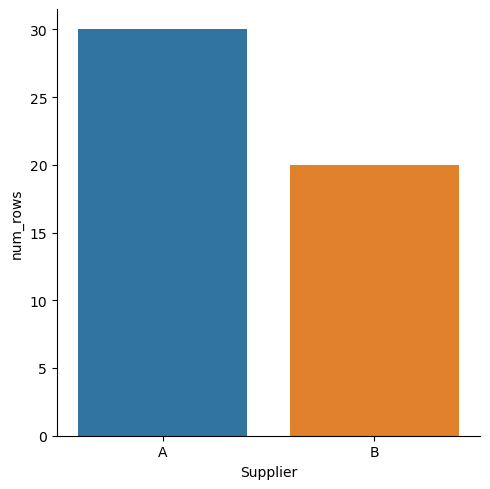

In [22]:
## 5. Explore the MARGINAL behavior of the variables in the data.
marginal_batch_df = batch_df.groupby(['Supplier']).size().reset_index(name='num_rows')

sns.catplot(data = marginal_batch_df, x = 'Supplier', kind = 'bar', y = 'num_rows')

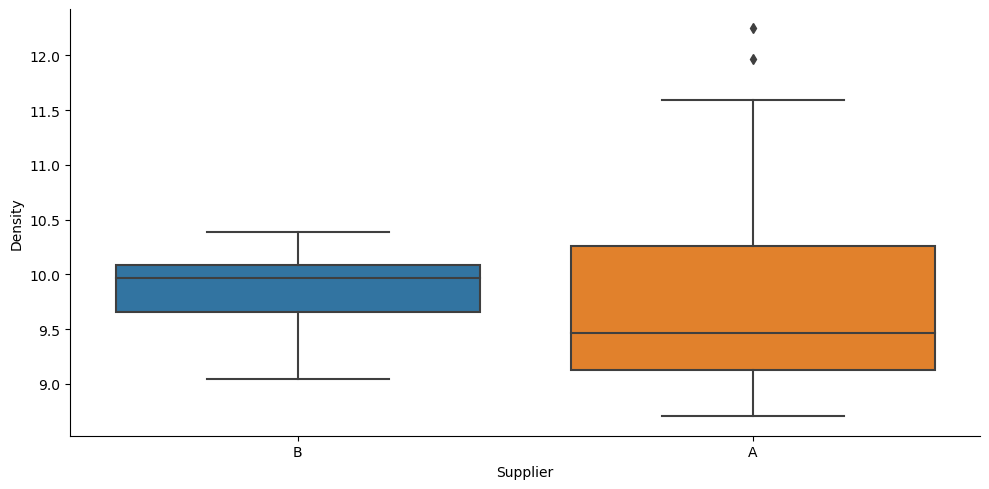

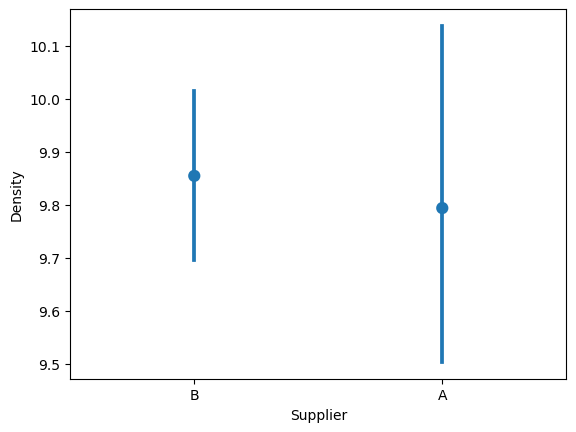

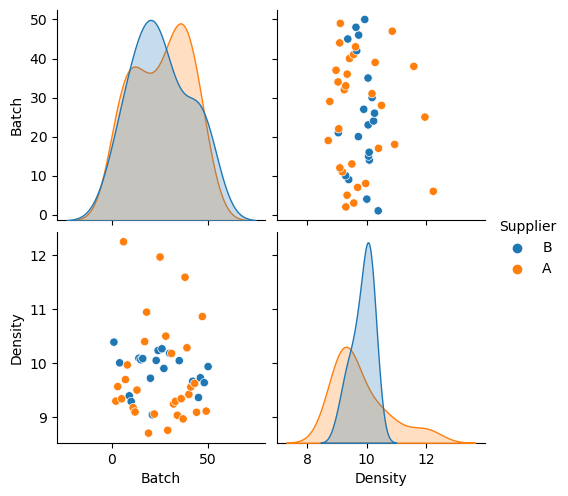

In [23]:
## 6. Explore the RELATIONSHIP between the variables in the data.
### 6.1. Summary statistics for each variable from Density to Supplier.
sns.catplot(data=batch_df, x='Supplier', y='Density', kind='box',aspect=2)
plt.show()

### 6.2. Average Density for each Supplier.
sns.pointplot(data=batch_df, y='Density', x='Supplier',join=False)
plt.show()

### 6.3 Desnsity relationship to batch for each Supplier.
sns.pairplot(batch_df, hue='Supplier',
             diag_kws={'common_norm':False})
plt.show()


merge the batch supplier data set with the (concatenated) machine data set

In [24]:
# 7. merge the batch supplier data set with the (concatenated) machine data set

dfa = pd.merge(machine_df, batch_df, on='Batch', how='inner')
dfa

ID  Batch  s_id         x1          x2         x3  \
0      B001-M01-S001      1     1  50.117118  102.167346  22.067812   
1      B001-M01-S002      1     2  46.887333  112.266102  23.197330   
2      B001-M01-S003      1     3  50.132744  103.674908  22.319933   
3      B001-M01-S004      1     4  48.501042  107.143156  22.162947   
4      B001-M01-S005      1     5  49.690442  102.120283  22.248696   
...              ...    ...   ...        ...         ...        ...   
14724  B050-M02-S092     50    92  52.690936   95.050804  20.324674   
14725  B050-M02-S093     50    93  52.348015   97.863144  20.884779   
14726  B050-M02-S094     50    94  52.187241   99.887013  20.439142   
14727  B050-M02-S095     50    95  52.875621  101.572057  20.648029   
14728  B050-M02-S096     50    96  52.491445   96.744458  20.814762   

              x4  machine_id Supplier    Density  
0      13.889524           1        B  10.388587  
1      13.064709           1        B  10.388587  
2      13.647482           1        B  10.388587  
3      14.077758           1        B  10.388587  
4      13.728666           1        B  10.388587  
...          ...         ...      ...        ...  
14724  10.963370           2        B   9.935676  
14725  11.156604           2        B   9.935676  
14726  11.303222           2        B   9.935676  
14727  11.084512           2        B   9.935676  
14728  10.886910           2        B   9.935676  

[14729 rows x 10 columns]

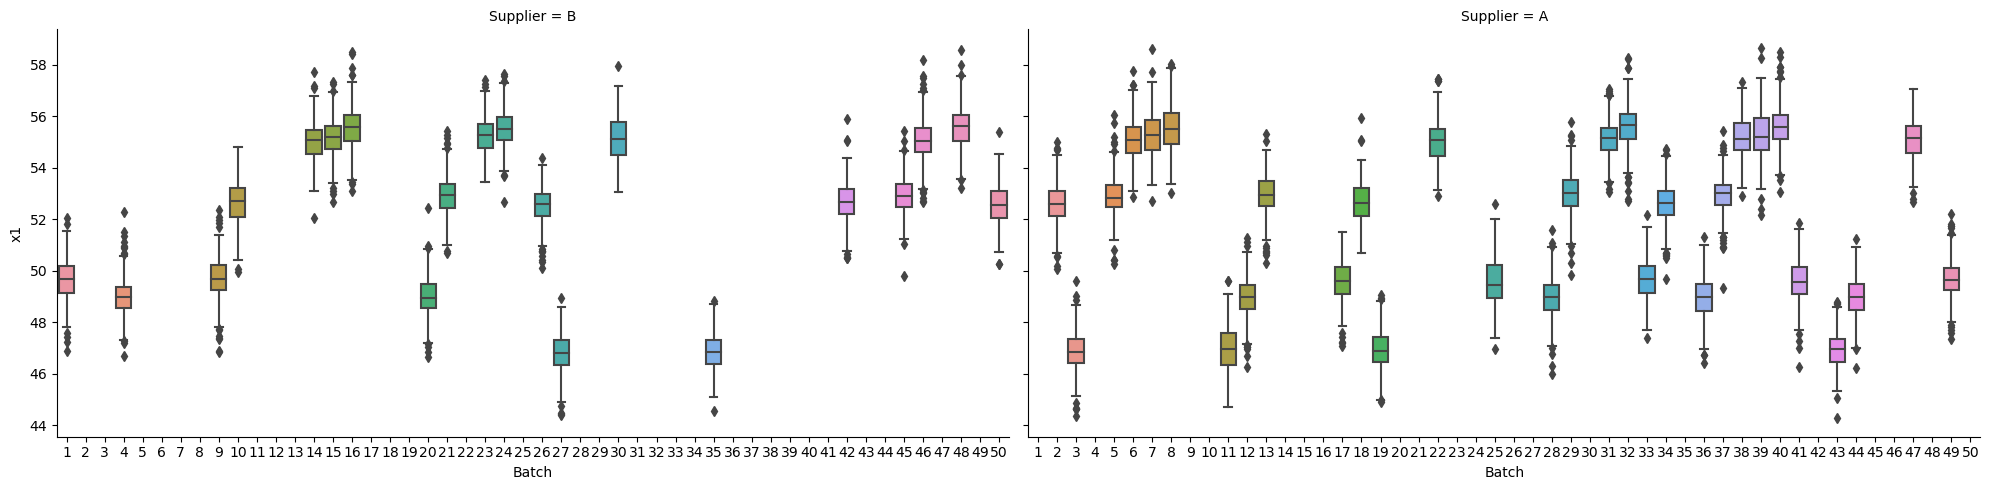

In [25]:
## 7.1 Summary statistics for the variables in the data set x1 to x4 vary across Batch given Supplier
sns.catplot(data=dfa, x='Batch', y='x1', kind='box', col ='Supplier', height=5, aspect=2, col_wrap=2)

In [ ]:
## 7.2 Relationship between x1 through x4 across Batch given Supplier
sns.pairplot(data=dfa, hue='Supplier', vars=['x1','x2','x3','x4'],
             diag_kws={'common_norm':False})

## Problem 03

The DROP TEST result data set file name is provided for you below. You must read in the CSV file and assign the dta set to the `test_df` object. 

You must perform the following **ESSENTIAL** activities:

* How many rows and columns are in the data? 
* What are the names and data types for each column?
* How many unique values are there for each column?
* How many missing values are there for each column?

You must visually explore the MARGINAL behavior of the variables in the data. You must use visualizations appropriate for the DATA TYPE of the columns.

You must visually explore RELATIONSHIPS between variables in the data. You must use visualizations appropriate for the DATA TYPES. You must make sure that your visualizations can answer the following questions:
* Count the number of times each unique value of `Result` occurs for each `test_group_id` value.

After exploring the `test_df` DataFrame, you **MUST** JOIN/MERGE the `test_df` DataFrame with the `dfa` DataFrame. Assign the merged DataFrame to the `dfb` DataFrame. You **MUST** answer the following:
* How many rows remain using the DEFAULT joining procedure?

You may add as many markdown and code cells as you see fit to answer this question. 

#### SOLUTION

In [ ]:
# define the test data set file name
test_file = 'midterm_test.csv'

In [ ]:
# read in the test data set

test_df = pd.read_csv(test_file)
test_df

In [ ]:
# 1. How many rows and columns are in the data set?
print(f'The test_df has {test_df.shape[0]} rows and {test_df.shape[1]} columns')

In [ ]:
# 2. What are the names and data types of the columns in the data set?
print(f'The names and data types of the columns in test_df are \n{test_df.dtypes}')

In [ ]:
# 3. How many unique values are there for each column of the data set?
print(f'The unique values for test_df are \n{test_df.nunique()}')

In [ ]:
# 4. How many missing values are there for each column of the data set?
print(f'The missing values for test_df are \n{test_df.isnull().sum()}')

In [ ]:
# 5. Explore the MARGINAL behavior of the variables in the data.
marginal_test_df = test_df.groupby(['Result']).size().reset_index(name='num_rows')
sns.catplot(data = marginal_test_df, x = 'Result', kind = 'bar', y = 'num_rows')

In [ ]:
# 6. Explore the RELATIONSHIP between the variables in the data.
## 6.1 Count the number of times each unique value of Result occurs for each test_group_id value
test_df_unique_count = test_df.groupby(['test_group_id','Result']).size().reset_index(name='num_rows')
sns.catplot(data = test_df_unique_count, x = 'test_group_id', col = 'Result', kind = 'bar', y = 'num_rows', col_wrap=1, height=6, aspect=5)
plt.xticks(fontsize=10)
plt.show()

In [ ]:
dfa

In [ ]:
# merge test_df with the dfa object

dfb = pd.merge(dfa, test_df, on='ID')
dfb

1412 rows reamin with the default joining procedure

## Problem 04

You must now examine the merged `dfb` object and answer the following:

* Count the number of times each unique value of `Result` occurs for each value of `machine_id`.
* Count the number of times each unique value of `Result` occurs for each value of `Supplier`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id`.
* Visualize the number of times each unique value of `Result` occurs per `Batch` for each value of `machine_id` and `Supplier`.
* Calculate the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id`.
* Visualize the PROPORTION of times the cell phone case failed the test in each `Batch` per `machine_id` and for each unique value of `Supplier`.

*HINT*: Remember that a FAILED test is encoded as `Result == 1`. How can you calculate the PROPORTION of times `Result == 1`?

Add as many cells as you see fit to answer this question.

#### SOLUTION

In [ ]:
# p4.1 Count the number of times each unique value of Result occurs for each value of machine_id
dfb_unique_count = dfb.groupby(['machine_id','Result']).size().reset_index(name='num_rows')
dfb_unique_count

In [ ]:
# p4.2 Count the number of times each unique value of Result occurs for each value of Supplier
dfb_unique_count = dfb.groupby(['Supplier','Result']).size().reset_index(name='num_rows')
dfb_unique_count

In [ ]:
# p4.3 Visualize the number of times each unique value of Result occurs per Batch for each value of machine_id
sns.catplot(data=dfb, x='Batch', col='machine_id', hue='Result', kind='count', height=4, aspect=3, col_wrap=1)

In [ ]:
# p4.4 Visualize the number of times each unique value of Result occurs per Batch for each value of machine_id and Supplier
sns.catplot(data=dfb, x='Batch', row='machine_id', hue='Result', kind='count', height=4, aspect=2.2, col='Supplier')

In [ ]:
# p4.5 Calculate the PROPORTION of times the cell phone case failed the test in each Batch per machine_id
dfb_prop = dfb.groupby(['Batch','machine_id','Result']).size().reset_index(name='num_rows')
dfb_prop

dfb_cnt_success = dfb_prop[dfb_prop['Result'] == 1].groupby(['Batch','machine_id','Result']).agg({'num_rows': 'sum'})
dfb_cnt_failed = dfb_prop[dfb_prop['Result'] == 0].groupby(['Batch','machine_id','Result']).agg({'num_rows': 'sum'})
dfb_cnt_all = dfb_prop.groupby(['Batch','machine_id']).agg({'num_rows': 'sum'})

dfb_prop_failed = dfb_cnt_failed / dfb_cnt_all
dfb_prop_failed.dropna(inplace=True)
dfb_prop_failed

In [ ]:
# p4.6 Visualize the proportion of times the cell phone case failed the test in each Batch per machine_id and for each unique value of Supplier
dfb_prop_with_supplier = dfb.groupby(['Batch','machine_id','Supplier','Result']).size().reset_index(name='num_rows')

dfb_cnt_success_with_supplier = dfb_prop_with_supplier[dfb_prop_with_supplier['Result'] == 1].groupby(['Batch','machine_id','Supplier','Result']).agg({'num_rows': 'sum'})
dfb_cnt_failed_with_supplier = dfb_prop_with_supplier[dfb_prop_with_supplier['Result'] == 0].groupby(['Batch','machine_id','Supplier','Result']).agg({'num_rows': 'sum'})
dfb_cnt_all_with_supplier = dfb_prop_with_supplier.groupby(['Batch','machine_id','Supplier']).agg({'num_rows': 'sum'})

dfb_prop_failed_with_supplier = dfb_cnt_failed_with_supplier / dfb_cnt_all_with_supplier
dfb_prop_failed_with_supplier.dropna(inplace=True)

# keep Batch info
dfb_prop_failed_with_supplier_plot =  dfb_prop_failed_with_supplier.reset_index()
dfb_prop_failed_with_supplier_plot.rename(columns={'num_rows': 'proportion'}, inplace=True)

sns.catplot(data=dfb_prop_failed_with_supplier_plot, x='Batch', y='proportion', row='machine_id', hue='Supplier', height=4, aspect=2.2)

## Problem 05

You must cluster the rows of `dfb` using the 4 operational variables `x1` through `x4`. You must decide how many clusters to use and describe how you made that choice. You may use KMeans OR Hierarchical clustering. Include any figures that helped you make that choice.

Visualize your cluster analysis results by:
* Plotting the number of observations per cluster.
* Visualizing the relationships between the operational variables GIVEN the cluster.

You are interested in the PROPORTION of cell phone cases that failed the DROP TEST. Are any of the clusters associated with higher failure PROPORTIONS than others? Based on your visualizations how would you describe that cluster?

Add as many cells as you see fit to answer this question.

#### SOLUTION

In [ ]:
# 0.Observation of relationship between variables
dfb_cluster = dfb[['x1','x2','x3','x4']]
sns.pairplot(dfb_cluster)

In [ ]:
# 1. Convert format
X = dfb_cluster.select_dtypes('number').copy().to_numpy()

# 2. Optimal number of clusters
tots_within=[]
K = range(1, 30)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123,n_init=25, max_iter=500).fit(X)
    tots_within.append(kmeans.inertia_)

fig,ax = plt.subplots(figsize=(6,4))
ax.plot(K, tots_within, 'bo-')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Total Within Sum of Squares')
plt.show()

4 clusters would be an appropriate choice.

In [ ]:
cluster_4 = KMeans(n_clusters=4, random_state=123,n_init=25, max_iter=500).fit_predict(X)
dfb_cluster_k4 = dfb_cluster.copy()
dfb_cluster_k4['k_4'] = pd.Series(cluster_4, index=dfb_cluster.index).astype('category')

dfb_cluster_k4

## Plot the number of observations in each cluster
sns.catplot(data=dfb_cluster_k4, x='k_4', kind='count')

## Visualize the relationships between the operational variables GIVEN the cluster
sns.pairplot(dfb_cluster_k4, hue='k_4', diag_kws={'common_norm':False})

In [ ]:
## Hierarchical Clustering

# 1.Standardize the data
X_dfb_features = dfb_cluster.select_dtypes('number').copy()
X_dfb = StandardScaler().fit_transform(X_dfb_features)

In [ ]:
### Default cluster
hclust_complete = hierarchy.complete(X_dfb)
sns.set_style('white')
fig = plt.subplots(figsize=(12,6))
dn = hierarchy.dendrogram(hclust_complete, no_labels=True)
plt.show()

In [ ]:
### Single Linkage
hclust_single = hierarchy.single(X_dfb)
sns.set_style('white')

fig = plt.subplots(figsize=(12,6))
dn = hierarchy.dendrogram(hclust_single, no_labels=True)
plt.show()

In [ ]:
### Average Linkage
hclust_average = hierarchy.average(X_dfb)
sns.set_style('white')

fig = plt.subplots(figsize=(12,6))
dn = hierarchy.dendrogram(hclust_average, no_labels=True)
plt.show()

In [ ]:
### Centroid Linkage
hclust_centroid = hierarchy.centroid(X_dfb)
sns.set_style('white')

fig = plt.subplots(figsize=(12,6))
dn = hierarchy.dendrogram(hclust_centroid, no_labels=True)
plt.show()

In [ ]:
### Ward Linkage
hclust_ward = hierarchy.ward(X_dfb)
sns.set_style('white')

fig = plt.subplots(figsize=(12,6))
dn = hierarchy.dendrogram(hclust_ward, no_labels=True)
plt.show()

All methods from Hierarchical Clustering showed same results with K-means clustering, showing that we could have 4 clusters in the data set. We continue use dfb_cluster_k4.

In [ ]:
## Plot clusters and failure proportions

df_cluster_result = pd.merge(dfb, dfb_cluster_k4, how='left')
df_cluster_result

In [ ]:
# count plot between k_4 and Result
sns.catplot(data=df_cluster_result, x='k_4', hue='Result', kind='count')

This shows that we have higher failure proportion than success rate in all 4 clusters, and cluster 3 has the highest failure proportion.